## Занятие 2. Pytorch туториал

In [6]:
from platform import python_version
print(python_version())

3.10.12


In [7]:
import torch
print(torch.__version__)

2.0.1


### Содержаниее
- ревью библиотеки pytorch
- туториал библиотеки einops
- написание с нуля ShuffleNet-v2

In [1]:
import torch
import numpy as np

#### 1.1 Тензоры: создание и свойства

In [2]:
# создание тензоров

t = torch.zeros((2, 3))
print(t)

print(
    torch.ones((3, 1)),
)

print(
    torch.rand((1, 2))
)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1.],
        [1.],
        [1.]])
tensor([[0.1127, 0.2792]])


In [5]:
print(
    t.double().dtype, 
    t.long().dtype
)

t, t.long()

torch.float64 torch.int64


(tensor([[0.9000, 0.9000],
         [0.9000, 0.9000],
         [0.9000, 0.9000]]),
 tensor([[0, 0],
         [0, 0],
         [0, 0]]))

In [6]:
# форма тензора 
t.shape, t.size()

(torch.Size([3, 2]), torch.Size([3, 2]))

In [7]:
t.device

device(type='cpu')

In [8]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    device = torch.device('cpu')
else:
    device = torch.device('cpu')

print(device)
t = t.to(device)

cpu


In [ ]:
#!g2.mig

# ВЫПОЛНЯЕТСЯ ДОЛГО

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print(device)
t = t.to(device)
print(t)

del t
t = torch.zeros((2, 3))

In [9]:
# копирование тензора - с формой, типом, девайсом
t, t.clone()

(tensor([[0.9000, 0.9000],
         [0.9000, 0.9000],
         [0.9000, 0.9000]]),
 tensor([[0.9000, 0.9000],
         [0.9000, 0.9000],
         [0.9000, 0.9000]]))

#### 1.2 Тензоры: индексация и изменение формы

In [10]:
t = torch.arange(18, device=device).cpu()
t

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [11]:
# интерпретация массива как многомерного тензора
tv = t.view((2, 3, 3))
tv

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]])

In [47]:
# можно сделать "срез" тензора также, как и в numpy
t_slice = t.view((2, 3, 3))[:, :-1, :]
t_slice

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 9, 10, 11],
         [12, 13, 14]]])

In [48]:
# булевая индексация
tv[tv % 2 == 0]

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16])

In [49]:
# превращение boolean маски - в список индексов True 
(tv % 2 == 0).nonzero()

tensor([[0, 0, 0],
        [0, 0, 2],
        [0, 1, 1],
        [0, 2, 0],
        [0, 2, 2],
        [1, 0, 1],
        [1, 1, 0],
        [1, 1, 2],
        [1, 2, 1]])

In [50]:
(tv % 2 == 0).nonzero(as_tuple=True)

(tensor([0, 0, 0, 0, 0, 1, 1, 1, 1]),
 tensor([0, 0, 1, 2, 2, 0, 1, 1, 2]),
 tensor([0, 2, 1, 0, 2, 1, 0, 2, 1]))

In [51]:
# можно использовать как координатный индекс, если вызвать с параметром as_tuple 
tv[
   (tv % 2 == 0).nonzero(as_tuple=True)
]


tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16])

In [52]:
# numel и nelement - количество элементов в тензоре
print(
    t_slice.numel(), 
    t_slice.nelement()    
)

12 12


In [53]:
# len возвращает не количество элементов, а длину первой оси
print(
    t_slice.shape,
    len(t_slice)
)

torch.Size([2, 2, 3]) 2


In [54]:
# посмотрим перед permute размерность
t_slice.shape

torch.Size([2, 2, 3])

In [55]:
# устанавливаем новый порядок всех осей
# (0, 1, 2) -> (0, 2, 1)
t_slice_permute = t_slice.permute(0, 2, 1)
print(t_slice)
print(t_slice_permute)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 9, 10, 11],
         [12, 13, 14]]])
tensor([[[ 0,  3],
         [ 1,  4],
         [ 2,  5]],

        [[ 9, 12],
         [10, 13],
         [11, 14]]])


In [56]:
# меняем местами две оси
t_slice_tr = t_slice.transpose(1, 2)
print(t_slice)
print(t_slice_tr)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 9, 10, 11],
         [12, 13, 14]]])
tensor([[[ 0,  3],
         [ 1,  4],
         [ 2,  5]],

        [[ 9, 12],
         [10, 13],
         [11, 14]]])


In [57]:
# подсказка к вопросу ниже
print(t_slice) 
print(t_slice.numel())

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 9, 10, 11],
         [12, 13, 14]]])
12


================================================================================
### **Вопрос-1**: что получится при исполнении строчки ниже?

In [ ]:
t_slice.view( t_slice.numel() )

================================================================================


### 1.3 Тензоры: объединение и разделение

In [67]:
# cat = concatenate
t2 = torch.cat([
    torch.zeros((1, 3, 3)),
    torch.ones((1, 3, 3))
], dim=2)
print(t2.shape)
t2

torch.Size([1, 3, 6])


tensor([[[0., 0., 0., 1., 1., 1.],
         [0., 0., 0., 1., 1., 1.],
         [0., 0., 0., 1., 1., 1.]]])

In [68]:
# ~un-concatenate вдоль оси
torch.unbind(t2, dim=2)

(tensor([[0., 0., 0.]]),
 tensor([[0., 0., 0.]]),
 tensor([[0., 0., 0.]]),
 tensor([[1., 1., 1.]]),
 tensor([[1., 1., 1.]]),
 tensor([[1., 1., 1.]]))

In [70]:
# ~un-concatenate вдоль оси на произвольные фрагменты
a, b = torch.split(t2, [2, 4], dim=2)
print(a.shape, b.shape)

torch.Size([1, 3, 2]) torch.Size([1, 3, 4])


In [72]:
# "найди отличие" от concatenate?

t3 = torch.stack([
    torch.zeros((1, 3, 3)),
    torch.ones((1, 3, 3))
], dim=2)
print(t3)

tensor([[[[0., 0., 0.],
          [1., 1., 1.]],

         [[0., 0., 0.],
          [1., 1., 1.]],

         [[0., 0., 0.],
          [1., 1., 1.]]]])


### 1.4 Тензоры: broadcast

In [74]:
# "единичные" оси можно убирать
print(
    t3.shape, 
    t3.squeeze(1).shape
)

torch.Size([1, 3, 2, 3]) torch.Size([1, 3, 2, 3])


In [77]:
# "единичные" оси можно добавлять
t2.shape, t2.unsqueeze(3).shape, t2[:, :, :, None].shape

(torch.Size([1, 3, 6]), torch.Size([1, 3, 6, 1]), torch.Size([1, 3, 6, 1]))

In [78]:
# вдоль единичныз осей для операций срабатывает broadcast, аналогично numpy
a = torch.arange(3)
b = torch.arange(6)
a.unsqueeze(0) - b.unsqueeze(1)

tensor([[ 0,  1,  2],
        [-1,  0,  1],
        [-2, -1,  0],
        [-3, -2, -1],
        [-4, -3, -2],
        [-5, -4, -3]])

================================================================================
### **Вопрос-2**
Даны два набора 64-мерных векторов: `x[B, N, 64]` и `y[B, M, 64 ]`

Хотим найти i и j такие, что скалярное произведение `(x[ i ], y[ j ])` максимально (в каждом батче - своё)

Задача: посчитать тензор скалярных произведений `S[B, N, M]`

In [ ]:
torch.manual_seed(19092023)

x = torch.rand((2, 3, 64)) - 0.5
y = torch.randn((2, 13, 64))

#####
dot_product = "your code here"
#####

assert dot_product.shape == (2, 3, 13)


In [ ]:
max_result = torch.max(
    dot_product.view((2, -1)), dim=-1
)
max_val, max_flat_index = max_result
print(f"Per batch max values:\n{max_val}")
print(f"\nPer batch max indices:\n{(dot_product == max_val.view((2, 1, 1))).nonzero()}")

In [ ]:
torch.dot(x[0, 2], y[0, 4])

================================================================================

### 2.1 Модули: интерфейс и параметры

In [117]:
from torch import nn


class SoftmaxWithT(nn.Module):
    """
    y[b, i] = exp( x[b,i] / T ) / Sum[j]( exp(x[b, j] / T ) )
    """
    def __init__(self, temperature=1.0):
        super().__init__() # не забывайте вызывать родительский конструктор!
        # param
        self.t = torch.tensor([temperature])
        
    def forward(self, z: torch.Tensor):
        numer = torch.exp(x / self.t)
        denom = torch.sum(numer, axis=-1, keepdims=True)
        return numer / denom
        
sm = SoftmaxWithT()

In [118]:
t =  torch.randn(2, 5)
print(sm(t))
print(torch.nn.functional.softmax(t, dim=-1))

tensor([[0.0475, 0.0760, 0.6299, 0.1061, 0.1405],
        [0.1843, 0.0996, 0.0373, 0.4231, 0.2556]], grad_fn=<DivBackward0>)
tensor([[0.0475, 0.0760, 0.6299, 0.1061, 0.1405],
        [0.1843, 0.0996, 0.0373, 0.4231, 0.2556]])


### Вопрос-3. Как изменить SoftmaxWithT чтобы не было nan?

In [123]:
print(sm(t * 100))
print(torch.nn.functional.softmax(t * 100, dim=-1))

tensor([[0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
        [8.3023e-37, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.3191e-22]],
       grad_fn=<DivBackward0>)
tensor([[0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
        [8.3023e-37, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.3191e-22]])


In [120]:
# Модули можно "отправлять" на device
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    t_gpu = t.to(device)
    # отправляются все parameters 
    sm_gpu = sm.to(device)
    y_gpu = sm_gpu(t_gpu)
    print(y_gpu)
else:
    print("Cuda is unavailable")

tensor([[0.0475, 0.0760, 0.6299, 0.1061, 0.1405],
        [0.1843, 0.0996, 0.0373, 0.4231, 0.2556]], device='cuda:0',
       grad_fn=<DivBackward0>)


In [129]:
sm.to(torch.device('cpu'))

SoftmaxWithT()

### 2.2 Модули: стандартные компоненты

In [125]:
t = torch.randn((1, 3, 224, 224))

# Последовательность модулей
net = nn.Sequential(
    nn.BatchNorm2d(num_features=3),
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=2, padding=1),
    nn.ReLU()
)

net(t).shape

torch.Size([1, 32, 112, 112])

### 2.3 Модули: градиенты

In [132]:
_t_data = (np.random.rand(2, 10).astype(np.float32) - 0.5) * 5

# Тензоры могут требовать, либо не требовать градиентов
t = torch.tensor(
    _t_data, 
    requires_grad=True
)
t

tensor([[-1.0554,  1.1500, -2.3222,  0.8322, -0.7500,  0.1188, -0.4059, -1.6447,
          1.3975,  0.4347],
        [-2.3744, -1.1864,  0.9607,  1.5164,  0.8554, -0.2894,  0.2136,  0.2469,
          0.9828,  1.6142]], requires_grad=True)

In [140]:
t.requires_grad

True

In [141]:
# при выполнении backward для всех* тензоров и параметров вычисляются градиенты (т.е. dL/dt)
y = sm(t)
y[0, 0].backward()
t.grad

tensor([[ 0.0487, -0.0113, -0.0004, -0.0082, -0.0017, -0.0040, -0.0024, -0.0007,
         -0.0145, -0.0055],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000]])

In [76]:
# Вызов .grad.zero_() обнуляет градиент
t.grad.zero_()
print(t.grad)

# Присваивание None удаляет градиент
t.grad = None
print(t.grad)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)
None


In [151]:
# градиенты накапливаются при каждом backward
# можно (но не обязательно!) делать backward не после каждого forward

t.grad.zero_()

for _ in range(10):
    y = sm(t)
    y[0, 0].backward()
t.grad

tensor([[ 0.2433, -0.0565, -0.0018, -0.0411, -0.0084, -0.0201, -0.0119, -0.0035,
         -0.0723, -0.0276],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000]])

In [152]:
t.grad = None

# Можно локально отключить вычисление градиентов - например на валидации 
# Для больших сетей это ускорит работу

with torch.no_grad():
    y = sm(t)    
    
    # Вызов backward приведет к ошибке
    # y[0, 0].backward()

print(t.grad)

None


In [153]:
list(sm.named_parameters())

[('t',
  Parameter containing:
  tensor([1.], requires_grad=True))]

In [84]:
sm.t.grad

In [85]:
sm.zero_grad()
sm.t.grad

In [157]:
# Не все операции дифференцируемы
class Argmax(nn.Module):
    def forward(self, x: torch.Tensor):
        return torch.argmax(x, dim=-1, keepdims=True)

    
net = nn.Sequential(
    SoftmaxWithT(),
    Argmax()
)
y = net(t)
y, y.grad_fn

(tensor([[8],
         [9]]),
 None)

In [ ]:
y[0].backward()

## 3. Einops
Библиотека для наглядного описания операций с тензорами

https://einops.rocks/

Название - от функции .einsum(), которая производит суммирование в "нотации Эйнштейна"

### Почему einops стоит использовать?
Пример-демонстрация - с использованием torch API для простой операции - нормализации и подготовки изображения

In [172]:
import torch

H, W = 64, 96
img_t = torch.rand(H, W, 3)
print(f"Хотим выполнить подготовку изображения {img_t.shape}")

Хотим выполнить подготовку изображения torch.Size([64, 96, 3])


In [160]:
# Можно релизовать функцию так:

def normalize(x):
    x = torch.permute(x[None], (0, 3, 1, 2))
    return x / torch.mean(x, axis=[2, 3], keepdims=True)

In [178]:
print("Получили единичный батч нормированных изображений") 
x1 = normalize(img_t)
x1.shape, x1.mean(axis=[-1, -2])

Получили единичный батч нормированных изображений


(torch.Size([1, 3, 64, 96]), tensor([[1., 1., 1.]]))

In [179]:
# Можно реализовать ту же функцию по-другому

def normalize2(x):
    x = x.transpose(-1, -2).transpose(-2, -3).unsqueeze(0)
    return x / torch.mean(x, axis=[2, 3], keepdims=True)

In [180]:
x2 = normalize2(img_t)
x2.shape, x2.mean(axis=[-1, -2])

(torch.Size([1, 3, 64, 96]), tensor([[1., 1., 1.]]))

In [181]:
# результаты одинаковы
torch.allclose(x1, x2)

True

In [182]:
# Что если подать на вход уже батч изображений?
bimg_t = torch.rand(1, H, W, 3)

print("==========1==========")
xb2 = normalize(bimg_t)
print(x2.shape, x2.mean(axis=[-1, -2]))

==========1==========


RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 5 is not equal to len(dims) = 4

In [183]:
print("==========2==========")
xb1 = normalize2(bimg_t)
print(xb1.shape, xb1.mean(axis=[-1, -2]))

==========2==========
torch.Size([1, 1, 3, 64, 96]) tensor([[[0.9950, 0.9985, 1.0065]]])


Проблема:
- ожидания от входа заданы неявно
- результат операций сложно понять по коду

Стандартное решение: 
- проставлять assert на форму
- писать комментарии
- указывать в названии переменных форму ("img_bchw")

Или:
- описывать операции более явно через einops

In [184]:
from einops import rearrange, reduce
# пример реализации через einops

def normalize_einops(x):
    x = rearrange(x, "h w c -> 1 c h w")
    return x / reduce(x, "b c h w -> b c 1 1", reduction="mean")

print(f"Идентичный результат? {torch.allclose(normalize_einops(img_t), x1)}")

Идентичный результат? True


### Что умеет einops?

In [187]:
from einops import rearrange
a = torch.arange(18).reshape((1, 3, 6)).float()
a

tensor([[[ 0.,  1.,  2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9., 10., 11.],
         [12., 13., 14., 15., 16., 17.]]])

In [188]:
# плющим
rearrange(a, 'B H W -> (B H W)')


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17.])

In [189]:
# название осей не важно
rearrange(a, 'Whatever you prefer -> (Whatever you prefer)')


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17.])

In [174]:
# порядок осей важен
rearrange(a, 'B H W -> (B W H)')


tensor([ 0.,  6., 12.,  1.,  7., 13.,  2.,  8., 14.,  3.,  9., 15.,  4., 10.,
        16.,  5., 11., 17.])

In [190]:
# добавляем единичную ось
rearrange(a, 'B H W -> B 1 H W') 

tensor([[[[ 0.,  1.,  2.,  3.,  4.,  5.],
          [ 6.,  7.,  8.,  9., 10., 11.],
          [12., 13., 14., 15., 16., 17.]]]])

In [193]:
# убираем единичную ось
rearrange(a, '1 H W -> H W') 


tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.],
        [12., 13., 14., 15., 16., 17.]])

In [198]:
# разбиваем на части
w1, w2 = rearrange(a, 'B H (k V) -> k B H V', k=2)
w1, w2

(tensor([[[ 0.,  1.,  2.],
          [ 6.,  7.,  8.],
          [12., 13., 14.]]]),
 tensor([[[ 3.,  4.,  5.],
          [ 9., 10., 11.],
          [15., 16., 17.]]]))

In [200]:
# конкатенируем две части
rearrange([w1, w2], 'k B H V -> B (k H) V')

tensor([[[ 0.,  1.,  2.],
         [ 6.,  7.,  8.],
         [12., 13., 14.],
         [ 3.,  4.,  5.],
         [ 9., 10., 11.],
         [15., 16., 17.]]])

In [203]:
# указываем оси явно (не влияет, если значения верны - иначе ошибка)
rearrange([w1, w2], 'k B H W -> B (k H) W', k=2, B=1, H=3, W=3)

tensor([[[ 0.,  1.,  2.],
         [ 6.,  7.,  8.],
         [12., 13., 14.],
         [ 3.,  4.,  5.],
         [ 9., 10., 11.],
         [15., 16., 17.]]])

In [204]:
from einops import reduce
reduce(a, 'B H W -> B 1 W', reduction='mean')

tensor([[[ 6.,  7.,  8.,  9., 10., 11.]]])

In [205]:
# с einops тоже можно записать операцию, которую сложно понять
reduce(a, 'B (kh H) (kw W) -> H 1 B (kh kw)', reduction='max', kh=3, kw=2)

tensor([[[[ 2.,  5.,  8., 11., 14., 17.]]]])

#### PS: название einops - от встроенной функции einsum

In [180]:
# создадим пример данных
a = torch.arange(18).reshape((1, 3, 6)).float()
b = torch.ones((6, 2)).float()
b[:, 0] *= -1
print(f"{a.shape}\n{a}\n")
print(f"{b.shape}\n{b}")

torch.Size([1, 3, 6])
tensor([[[ 0.,  1.,  2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9., 10., 11.],
         [12., 13., 14., 15., 16., 17.]]])

torch.Size([6, 2])
tensor([[-1.,  1.],
        [-1.,  1.],
        [-1.,  1.],
        [-1.,  1.],
        [-1.,  1.],
        [-1.,  1.]])


In [181]:
# Запись через einsum
c = torch.einsum('bnc,ck->bnk', a, b)
print(f"{c.shape}\n\n{c}")

torch.Size([1, 3, 2])

tensor([[[-15.,  15.],
         [-51.,  51.],
         [-87.,  87.]]])


In [182]:
# То же самое через tensordot
torch.tensordot(a, b, dims=[[2], [0]])

tensor([[[-15.,  15.],
         [-51.,  51.],
         [-87.,  87.]]])

In [183]:
# в einsum порядок осей выхода можно менять
torch.einsum('bnc,ck->bkn', a, b)

tensor([[[-15., -51., -87.],
         [ 15.,  51.,  87.]]])

In [184]:
# einsum ~ .tensordot + .permute
torch.tensordot(a, b, dims=[[2], [0]]).permute(0, 2, 1)

tensor([[[-15., -51., -87.],
         [ 15.,  51.,  87.]]])

### Вопрос-4. Пишем ChannelShuffle с einops
Пусть есть тензор `x[B,C,H,W]` формы (1, 8, 1, 1).

Пусть `x = [1, 1, 1, 1,  0, 0, 0, 0]`. 

Тогда `ChannelShuffle(x, n_groups=2) = [1, 0, 1, 0, 1, 0, 1, 0]`



In [212]:
# реализация torch
cs2 = torch.nn.ChannelShuffle(groups=2)
x = torch.tensor([1,1,1,1, 0,0,0,0]).view((1, 8, 1, 1))
cs2(x).flatten()

tensor([1, 0, 1, 0, 1, 0, 1, 0])

In [214]:
def einops_channel_shuffle_group2(x):
    return "your code here"

x_t = torch.rand(4, 16, 64, 96)
res_t = cs(x_t)
res_ein = einops_channel_shuffle_group2(x_t)

torch.allclose(res_t, res_ein)

True

### 4.1 ShuffleNet v2: пишем блок

[1] ShuffleNet V2: Practical Guidelines for Efficient 
CNN Architecture Design
.
https://openaccess.thecvf.com/content_ECCV_2018/papers/Ningning_Light-weight_CNN_Architecture_ECCV_2018_paper.pdf

![resnet blocks were not loaded](shufflenet_blocks.png "Resnet Blocks[1]")

In [1]:
import torch
from torch import nn
from einops.layers.torch import Rearrange


### Вопрос-5.
Пишем "ShufflNetv2 basic unit".


Два варианта:
1. (c) не меняет HW 
1. (d) понижает размерность HW в два раза

- В (c)-варианте есть ChannelSplit, суммарное количество каналов $C_{out} = C_{in}/2 + C_{in}/2 = C_{in}$
- В (d)-варианте вместо ChannelSplit - копирование, суммарное количество каналов $C_{out} = C_{in} + C_{in} = 2 * C_{in}$

Заполните пропуски pattern в конструкторе

In [2]:
class ShuffleUnit(nn.Module):
    def __init__(self, stride, in_channels, out_channels=None):
        super().__init__()
        self.stride = stride
        
        if out_channels is not None:
            if stride == 1:
                assert (in_channels == out_channels)
            elif stride == 2:
                assert (in_channels * 2 == out_channels)
            else:
                assert False, "Stride must be 1 or 2"
                
        work_channels = in_channels // 2 * self.stride
        
        self.branch_r = nn.Sequential(
            nn.Conv2d(in_channels=work_channels, out_channels=work_channels, kernel_size=1, stride=1),
            nn.BatchNorm2d(num_features=work_channels),
            nn.ReLU(),

            nn.Conv2d(
                in_channels=work_channels, 
                out_channels=work_channels, 
                groups=work_channels, 
                kernel_size=3, 
                stride=self.stride,
                padding=1
            ),
            nn.BatchNorm2d(num_features=work_channels),
            
            nn.Conv2d(in_channels=work_channels, out_channels=work_channels, kernel_size=1),
            nn.BatchNorm2d(num_features=work_channels),
            nn.ReLU(),
        )
        if stride == 1:
            self.branch_l = nn.Identity()
        else:
            self.branch_l = nn.Sequential(
                nn.Conv2d(
                    in_channels=work_channels, 
                    out_channels=work_channels, 
                    groups=work_channels, 
                    kernel_size=3, 
                    stride=2,
                    padding=1
                ),
                nn.BatchNorm2d(num_features=work_channels),
                
                nn.Conv2d(in_channels=work_channels, out_channels=work_channels, kernel_size=1),
                nn.BatchNorm2d(num_features=work_channels),
                nn.ReLU(),
            )
        self.split = Rearrange('your pattern here', split=2)
        self.concat_and_channel_shuffle = Rearrange(
            'your other pattern here', num=2
        )
        
    def forward(self, x):
        if self.stride == 1:
            x_l, x_r = self.split(x)
        elif self.stride == 2:
            x_l = x
            x_r = x
        else:
            assert(False)

        x_l = self.branch_l(x_l)
        x_r = self.branch_r(x_r)
        y = self.concat_and_channel_shuffle([x_l, x_r])
        return y

#### 4.2 ShuffleNet v2: пишем сеть


![resnet arch was not loaded](shufflenet_arch.png "Resnet Arch")

In [3]:
from einops.layers.torch import Reduce

class ShuffleNet2(nn.Module):
    def __init__(self, out_features=1000, with_pool: bool = False):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=58, kernel_size=3, stride=2, padding=1)
        if with_pool:
            self.max_pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        else:
            self.max_pool = nn.Identity()
        self.stage2 = nn.Sequential(*(
            [ShuffleUnit(stride=2, in_channels=58, out_channels=116)] +
            [ShuffleUnit(stride=1, in_channels=116, out_channels=116) for _ in range(3)]
        ))
        self.stage3 = nn.Sequential(*(
            [ShuffleUnit(stride=2, in_channels=116, out_channels=232)] +
            [ShuffleUnit(stride=1, in_channels=232, out_channels=232) for _ in range(7)]
        ))
        self.stage4 = nn.Sequential(*(
            [ShuffleUnit(stride=2, in_channels=232, out_channels=464)] +
            [ShuffleUnit(stride=1, in_channels=464, out_channels=464) for _ in range(3)]
        ))
        self.conv5 = nn.Conv2d(in_channels=464, out_channels=1024, kernel_size=1)
        self.global_pool = Reduce('b c h w -> b c', reduction='mean')
        self.fc = nn.Linear(in_features=1024, out_features=out_features)

    def forward(self, x):
        x = self.conv1(x)
        x = self.max_pool(x)
        x = self.stage2(x)
        x = self.stage3(x)
        x = self.stage4(x)
        x = self.conv5(x)
        x = self.global_pool(x)
        x = self.fc(x)
        return x

In [4]:
model = ShuffleNet2()
sum(p.numel() for p in model.parameters() if p.requires_grad)

2289902

In [5]:
from torchvision.models import shufflenet_v2_x1_0
_model = shufflenet_v2_x1_0()
sum(p.numel() for p in _model.parameters() if p.requires_grad)

2278604

#### 4.3 Обучение ShuffleNet: готовим данные CIFAR10


In [226]:
import torch.optim as optim
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

In [ ]:
batch_size = 100
    

In [227]:
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

data_path = Path().absolute() / 'data'

trainset = torchvision.datasets.CIFAR10(root=data_path, train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=data_path, train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [220]:
plt.rcParams['figure.figsize'] = [18, 12]

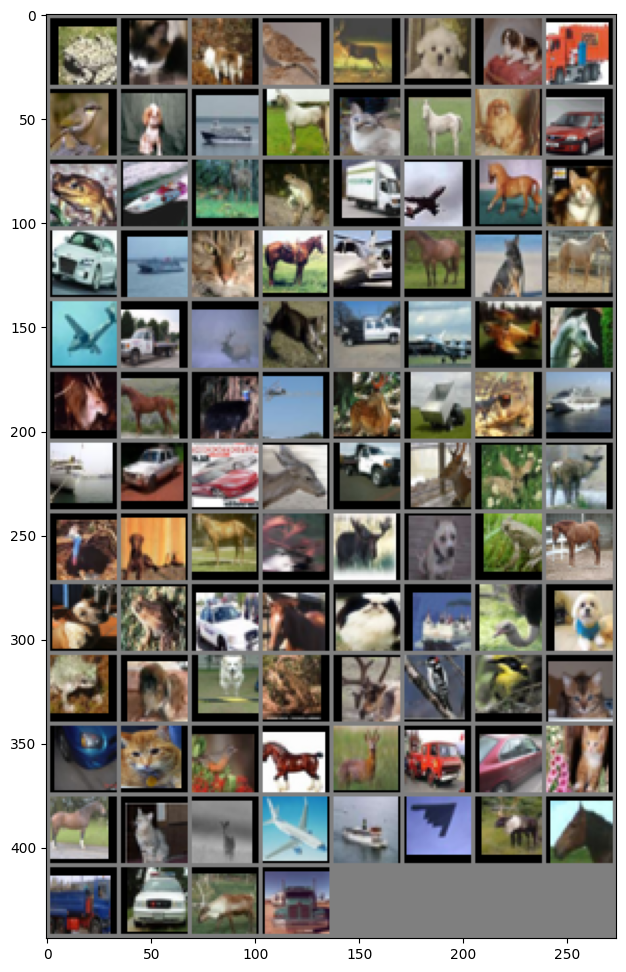

 frog   cat  deer  bird  deer   dog   dog truck  bird   dog  ship horse   cat horse   dog   car  frog  ship  deer  frog truck plane horse   cat   car  ship   cat horse plane horse   dog horse plane truck  deer   cat truck plane plane horse  deer horse  bird plane  deer truck  frog  ship  ship   car   car  deer truck  deer  deer  deer  bird   dog horse  deer  deer   dog  frog horse   dog  frog   car horse   dog  ship  bird   dog  frog   dog   dog  frog  deer  bird  bird   cat   car   cat  bird horse  deer truck   car   cat horse   cat  deer plane  ship plane  deer horse truck   car  deer truck


In [221]:
def imshow(img):
    img = img / 2 + 0.5 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

#### 4.4 Shuffle Net v2: обучем на CIFAR10

In [222]:
from tqdm import tqdm
from collections import defaultdict

class SimpleTrainer:
    def __init__(self, model, trainloader, testloader, loss, device=torch.device('cuda:0'), opt_kwargs={'lr': 1e-2}):
        self.model = model.to(device)
        self.trainloader = trainloader
        self.testloader = testloader
        self.loss = loss.to(device)
        self.device = device

        self.opt = torch.optim.SGD(self.model.parameters(), **opt_kwargs)

    def train_step(self, inputs, labels):
        inputs, labels = inputs.to(self.device), labels.to(self.device)
        
        self.opt.zero_grad()
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        loss.backward()
        
        self.opt.step()
        return {'loss': loss.cpu().item(), 'lr': self.scheduler.get_last_lr()[0]}

    def test_step(self, inputs, labels):
        inputs, labels = inputs.to(self.device), labels.to(self.device)

        with torch.no_grad():
            outputs = self.model(inputs)
            loss = self.loss(outputs, labels)
            _, predictions = torch.max(outputs, 1)
        accuracy = (predictions == labels).sum() / labels.numel()
        return {'loss': loss.cpu().item(), 'accuracy': accuracy.item()}

    def _run_epoch(self, loader, step_func):
        step_logs = []    
        epoch_logs = defaultdict(lambda: 0.0)
        with tqdm(total=len(loader.dataset)/loader.batch_size) as pbar:
            for (inputs, labels) in loader:
                step_logs.append(step_func(inputs, labels))
                pbar.update()
                msg = "|".join(
                    "{}={:1.3E}".format(k,v)
                    for (k,v) in step_logs[-1].items()
                )
                pbar.set_description(msg)
                
                for k, v in step_logs[-1].items():
                    epoch_logs[k] += v
        for k in epoch_logs:
            epoch_logs[k] = epoch_logs[k] / len(step_logs)
        epoch_logs['step_logs'] = step_logs
        return epoch_logs

    def train(self, epochs=50):
        train_logs = []
        test_logs = []
        
        self.scheduler = torch.optim.lr_scheduler.StepLR(self.opt, gamma=0.5, step_size=epochs/8)
        
        for ep in range(epochs):
            print(f"Epoch {ep}")
            
            self.model.train()
            train_logs.append(self._run_epoch(self.trainloader, self.train_step))
    
            self.model.eval()
            with torch.no_grad():
                test_logs.append(self._run_epoch(self.testloader, self.test_step))
            
            self.scheduler.step()
            
        return train_logs, test_logs


In [53]:
model = ShuffleNet2(out_features=10)

trainer = SimpleTrainer(
    model=model,
    trainloader=trainloader,
    testloader=testloader,
    loss=torch.nn.CrossEntropyLoss(),
    opt_kwargs={'lr':1e-2, 'weight_decay': 5e-4, 'momentum': 0.9}
)


In [54]:
train_logs, test_logs = trainer.train(epochs=100)

Epoch 0


loss=1.450E+00|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:26<00:00, 18.67it/s]
loss=1.535E+00|accuracy=3.900E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 14.10it/s]


Epoch 1


loss=1.447E+00|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:26<00:00, 18.75it/s]
loss=1.319E+00|accuracy=4.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.79it/s]


Epoch 2


loss=1.306E+00|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.11it/s]
loss=1.221E+00|accuracy=5.400E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.54it/s]


Epoch 3


loss=1.247E+00|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.37it/s]
loss=1.221E+00|accuracy=5.800E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 14.25it/s]


Epoch 4


loss=1.046E+00|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:26<00:00, 18.70it/s]
loss=9.299E-01|accuracy=6.600E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.86it/s]


Epoch 5


loss=1.168E+00|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.20it/s]
loss=9.551E-01|accuracy=6.200E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.61it/s]


Epoch 6


loss=1.273E+00|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 17.89it/s]
loss=7.765E-01|accuracy=7.300E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.28it/s]


Epoch 7


loss=7.926E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.30it/s]
loss=7.596E-01|accuracy=7.200E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.12it/s]


Epoch 8


loss=9.966E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.20it/s]
loss=7.314E-01|accuracy=7.600E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.93it/s]


Epoch 9


loss=6.979E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.21it/s]
loss=7.388E-01|accuracy=7.300E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.41it/s]


Epoch 10


loss=7.625E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.18it/s]
loss=6.193E-01|accuracy=7.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 12.64it/s]


Epoch 11


loss=7.764E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.50it/s]
loss=6.579E-01|accuracy=7.400E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.04it/s]


Epoch 12


loss=8.724E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 17.97it/s]
loss=6.616E-01|accuracy=7.900E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 12.97it/s]


Epoch 13


loss=8.604E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.31it/s]
loss=6.338E-01|accuracy=8.200E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.85it/s]


Epoch 14


loss=9.375E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.21it/s]
loss=5.289E-01|accuracy=8.000E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.46it/s]


Epoch 15


loss=6.898E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.46it/s]
loss=6.162E-01|accuracy=7.900E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 12.99it/s]


Epoch 16


loss=6.386E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.12it/s]
loss=6.295E-01|accuracy=7.800E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.42it/s]


Epoch 17


loss=6.827E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.25it/s]
loss=5.700E-01|accuracy=7.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.20it/s]


Epoch 18


loss=5.552E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.24it/s]
loss=5.356E-01|accuracy=7.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 12.84it/s]


Epoch 19


loss=7.187E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.06it/s]
loss=5.983E-01|accuracy=7.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.39it/s]


Epoch 20


loss=5.338E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:28<00:00, 17.79it/s]
loss=6.228E-01|accuracy=7.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.05it/s]


Epoch 21


loss=5.692E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.40it/s]
loss=6.531E-01|accuracy=7.800E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.50it/s]


Epoch 22


loss=4.901E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.34it/s]
loss=5.145E-01|accuracy=8.300E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.27it/s]


Epoch 23


loss=5.882E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.01it/s]
loss=5.106E-01|accuracy=8.000E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.31it/s]


Epoch 24


loss=5.089E-01|lr=1.000E-02: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.20it/s]
loss=4.742E-01|accuracy=8.300E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.42it/s]


Epoch 25


loss=5.573E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 17.96it/s]
loss=4.388E-01|accuracy=8.600E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.52it/s]


Epoch 26


loss=5.433E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:26<00:00, 18.64it/s]
loss=4.567E-01|accuracy=8.400E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.91it/s]


Epoch 27


loss=5.566E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.50it/s]
loss=4.791E-01|accuracy=8.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.71it/s]


Epoch 28


loss=3.242E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:26<00:00, 19.01it/s]
loss=4.542E-01|accuracy=8.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:06<00:00, 15.35it/s]


Epoch 29


loss=4.532E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:25<00:00, 19.24it/s]
loss=4.197E-01|accuracy=8.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:06<00:00, 14.83it/s]


Epoch 30


loss=3.007E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.35it/s]
loss=3.888E-01|accuracy=8.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.14it/s]


Epoch 31


loss=4.259E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.18it/s]
loss=4.374E-01|accuracy=8.300E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:08<00:00, 12.35it/s]


Epoch 32


loss=3.934E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.19it/s]
loss=4.331E-01|accuracy=8.400E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:08<00:00, 12.22it/s]


Epoch 33


loss=4.111E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.27it/s]
loss=4.189E-01|accuracy=8.900E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.33it/s]


Epoch 34


loss=3.534E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.41it/s]
loss=5.014E-01|accuracy=8.600E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.75it/s]


Epoch 35


loss=3.600E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.42it/s]
loss=5.067E-01|accuracy=8.200E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.70it/s]


Epoch 36


loss=3.533E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.43it/s]
loss=4.336E-01|accuracy=8.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.65it/s]


Epoch 37


loss=3.549E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 17.97it/s]
loss=5.435E-01|accuracy=8.400E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.24it/s]


Epoch 38


loss=3.235E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 17.97it/s]
loss=5.697E-01|accuracy=8.000E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.42it/s]


Epoch 39


loss=3.374E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.00it/s]
loss=4.998E-01|accuracy=8.200E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.22it/s]


Epoch 40


loss=3.781E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.49it/s]
loss=4.347E-01|accuracy=8.400E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.40it/s]


Epoch 41


loss=4.128E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.32it/s]
loss=4.651E-01|accuracy=8.100E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 14.10it/s]


Epoch 42


loss=3.512E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 17.96it/s]
loss=4.705E-01|accuracy=8.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.65it/s]


Epoch 43


loss=2.153E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.20it/s]
loss=4.903E-01|accuracy=8.300E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.29it/s]


Epoch 44


loss=3.785E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.06it/s]
loss=5.218E-01|accuracy=8.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.69it/s]


Epoch 45


loss=3.454E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.21it/s]
loss=4.072E-01|accuracy=8.300E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.70it/s]


Epoch 46


loss=3.675E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.11it/s]
loss=4.950E-01|accuracy=8.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.27it/s]


Epoch 47


loss=2.793E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 17.98it/s]
loss=5.329E-01|accuracy=8.300E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.05it/s]


Epoch 48


loss=3.124E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.39it/s]
loss=4.132E-01|accuracy=8.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.82it/s]


Epoch 49


loss=3.846E-01|lr=5.000E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.16it/s]
loss=4.428E-01|accuracy=8.300E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 14.04it/s]


Epoch 50


loss=2.266E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.37it/s]
loss=3.899E-01|accuracy=8.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.38it/s]


Epoch 51


loss=2.560E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.31it/s]
loss=4.137E-01|accuracy=8.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 14.02it/s]


Epoch 52


loss=3.150E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 17.99it/s]
loss=4.235E-01|accuracy=8.900E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.75it/s]


Epoch 53


loss=1.871E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.27it/s]
loss=4.204E-01|accuracy=8.600E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.68it/s]


Epoch 54


loss=2.492E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.28it/s]
loss=4.053E-01|accuracy=8.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.67it/s]


Epoch 55


loss=2.180E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.49it/s]
loss=3.993E-01|accuracy=8.900E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.34it/s]


Epoch 56


loss=3.820E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.34it/s]
loss=4.514E-01|accuracy=8.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.87it/s]


Epoch 57


loss=2.473E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.50it/s]
loss=5.060E-01|accuracy=8.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.77it/s]


Epoch 58


loss=3.399E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.25it/s]
loss=4.035E-01|accuracy=8.900E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.72it/s]


Epoch 59


loss=2.460E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.09it/s]
loss=4.107E-01|accuracy=8.800E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.82it/s]


Epoch 60


loss=1.828E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.00it/s]
loss=3.825E-01|accuracy=8.900E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.95it/s]


Epoch 61


loss=3.674E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.29it/s]
loss=4.474E-01|accuracy=8.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:06<00:00, 14.30it/s]


Epoch 62


loss=2.496E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.48it/s]
loss=4.557E-01|accuracy=8.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.70it/s]


Epoch 63


loss=3.028E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.41it/s]
loss=4.027E-01|accuracy=8.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.71it/s]


Epoch 64


loss=1.808E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.27it/s]
loss=4.965E-01|accuracy=8.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 14.03it/s]


Epoch 65


loss=3.006E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.33it/s]
loss=4.247E-01|accuracy=8.800E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.62it/s]


Epoch 66


loss=1.568E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.34it/s]
loss=4.589E-01|accuracy=8.400E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.68it/s]


Epoch 67


loss=1.922E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.00it/s]
loss=4.180E-01|accuracy=8.600E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.68it/s]


Epoch 68


loss=2.803E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.19it/s]
loss=4.884E-01|accuracy=8.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.36it/s]


Epoch 69


loss=1.542E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.51it/s]
loss=5.167E-01|accuracy=8.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.09it/s]


Epoch 70


loss=2.308E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:25<00:00, 19.48it/s]
loss=4.044E-01|accuracy=8.900E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:06<00:00, 15.12it/s]


Epoch 71


loss=2.326E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:25<00:00, 19.49it/s]
loss=4.718E-01|accuracy=8.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:06<00:00, 15.79it/s]


Epoch 72


loss=1.477E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:25<00:00, 19.27it/s]
loss=5.249E-01|accuracy=8.400E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:06<00:00, 14.70it/s]


Epoch 73


loss=1.323E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:28<00:00, 17.75it/s]
loss=5.713E-01|accuracy=8.400E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 12.53it/s]


Epoch 74


loss=1.265E-01|lr=2.500E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.26it/s]
loss=4.276E-01|accuracy=8.400E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.09it/s]


Epoch 75


loss=2.022E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.18it/s]
loss=4.866E-01|accuracy=8.600E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.38it/s]


Epoch 76


loss=2.330E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.03it/s]
loss=4.442E-01|accuracy=8.600E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.28it/s]


Epoch 77


loss=2.523E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 17.90it/s]
loss=4.031E-01|accuracy=8.600E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.72it/s]


Epoch 78


loss=2.151E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:28<00:00, 17.51it/s]
loss=4.349E-01|accuracy=8.600E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:10<00:00,  9.54it/s]


Epoch 79


loss=2.540E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:32<00:00, 15.23it/s]
loss=5.547E-01|accuracy=8.400E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.31it/s]


Epoch 80


loss=1.255E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.33it/s]
loss=4.681E-01|accuracy=8.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 14.06it/s]


Epoch 81


loss=1.759E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.10it/s]
loss=4.900E-01|accuracy=8.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.51it/s]


Epoch 82


loss=1.768E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 17.93it/s]
loss=4.058E-01|accuracy=8.600E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 14.01it/s]


Epoch 83


loss=8.721E-02|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.01it/s]
loss=4.774E-01|accuracy=8.400E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 14.24it/s]


Epoch 84


loss=1.821E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.14it/s]
loss=4.970E-01|accuracy=8.400E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.52it/s]


Epoch 85


loss=1.672E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 17.89it/s]
loss=5.475E-01|accuracy=8.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.09it/s]


Epoch 86


loss=1.523E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.03it/s]
loss=5.280E-01|accuracy=8.600E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.09it/s]


Epoch 87


loss=1.121E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.25it/s]
loss=4.951E-01|accuracy=8.900E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.41it/s]


Epoch 88


loss=9.686E-02|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.17it/s]
loss=4.794E-01|accuracy=8.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.38it/s]


Epoch 89


loss=2.664E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.17it/s]
loss=4.952E-01|accuracy=8.400E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.90it/s]


Epoch 90


loss=2.926E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.19it/s]
loss=4.886E-01|accuracy=8.600E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.70it/s]


Epoch 91


loss=2.031E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.34it/s]
loss=4.857E-01|accuracy=8.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.76it/s]


Epoch 92


loss=1.345E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 17.93it/s]
loss=5.829E-01|accuracy=8.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.84it/s]


Epoch 93


loss=1.110E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.34it/s]
loss=5.605E-01|accuracy=8.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.54it/s]


Epoch 94


loss=1.463E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 17.99it/s]
loss=5.083E-01|accuracy=8.600E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.70it/s]


Epoch 95


loss=2.050E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.41it/s]
loss=4.931E-01|accuracy=8.700E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.81it/s]


Epoch 96


loss=1.535E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 17.96it/s]
loss=5.100E-01|accuracy=8.600E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.52it/s]


Epoch 97


loss=1.888E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.32it/s]
loss=5.019E-01|accuracy=8.800E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.49it/s]


Epoch 98


loss=1.580E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.00it/s]
loss=5.444E-01|accuracy=8.400E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.73it/s]


Epoch 99


loss=1.780E-01|lr=1.250E-03: 100%|████████████████████████████████████████████████████████████████████████████████████| 500/500.0 [00:27<00:00, 18.12it/s]
loss=5.959E-01|accuracy=8.500E-01: 100%|██████████████████████████████████████████████████████████████████████████████| 100/100.0 [00:07<00:00, 13.68it/s]


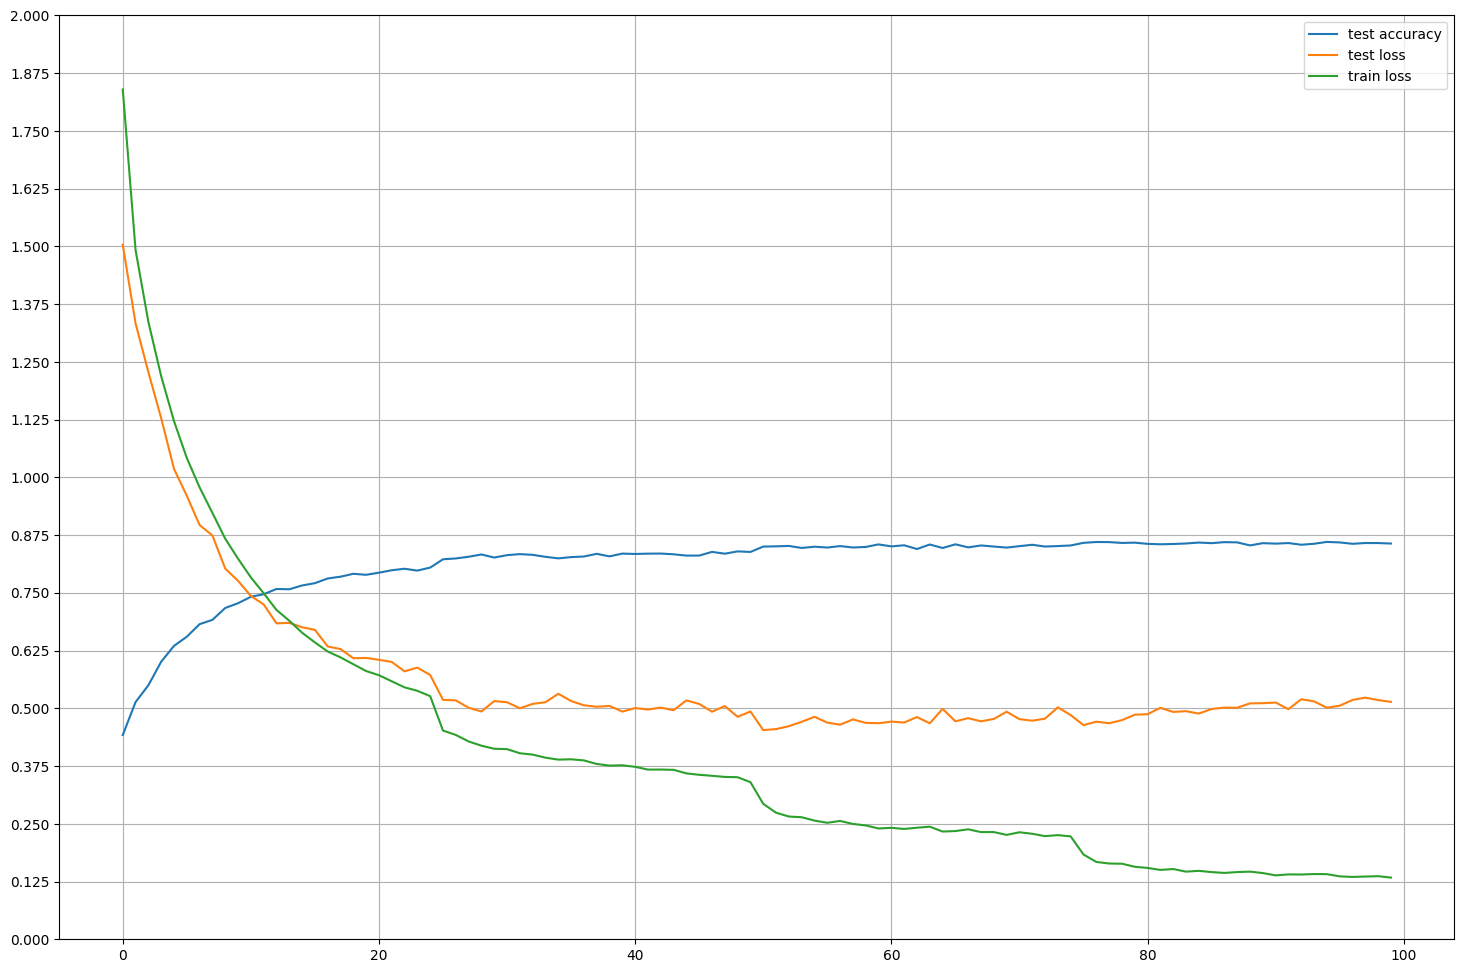

In [59]:
plt.plot(list(x['accuracy'] for x in test_logs), label='test accuracy')
plt.plot(list(x['loss'] for x in test_logs), label='test loss')
plt.plot(list(x['loss'] for x in train_logs), label='train loss')
plt.gca().set_yticks(np.linspace(0, 2, 17))
plt.grid()
plt.legend()